# Description

Generates a plot between the projection of a gene expression data set (systemic lupus erythematosus (SLE) whole blood (WB) from the MultiPLIER paper) into the LV603 (a neutrophil-termed latent variable) and a neutrophil count estimation.

See the [MultiPLIER paper](https://doi.org/10.1016/j.cels.2019.04.003) for more details.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import conf

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None
), "The manuscript directory was not configured"

display(conf.MANUSCRIPT["BASE_DIR"])

'/home/miltondp/projects/labs/greenelab/phenoplier_manuscript'

# Settings

In [4]:
LV_NUMBER_SELECTED = 603
LV_NAME_SELECTED = f"LV{LV_NUMBER_SELECTED}"
display(LV_NAME_SELECTED)

'LV603'

In [5]:
OUTPUT_FIGURES_DIR = Path(conf.MANUSCRIPT["FIGURES_DIR"], "entire_process").resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/entire_process')

# Load data

In [6]:
input_file = conf.MULTIPLIER["BANCHEREAU_MCPCOUNTER_NEUTROPHIL_FILE"]
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/data/multiplier/Banchereau_MCPcounter_neutrophil_LV.tsv')

In [7]:
data = pd.read_csv(input_file, sep="\t")

In [8]:
data.shape

(853, 10)

In [9]:
data.head()

,Sample,Neutrophil_estimate,LV2,LV27,LV34,LV87,Neutrophil.Count,recount2_LV524,recount2_LV603,recount2_LV985
0,GSM1594269,0.521043,0.011861,0.266736,-0.190549,0.223130,5.68,-0.002298,0.040778,-0.016060
1,GSM1594270,0.462452,0.006286,-0.116695,0.123172,-0.258540,1.73,-0.013544,-0.034074,0.049677
2,GSM1594271,0.605204,0.101035,0.239062,0.667674,0.455306,4.16,0.103794,0.203406,0.171382
3,GSM1594273,0.378277,-0.002747,-0.320055,-0.152002,0.026976,2.52,-0.027902,-0.021666,0.023682
4,GSM1594274,0.541385,-0.094829,0.226326,0.454731,0.175605,4.96,0.099851,0.085479,0.011739


# Plot

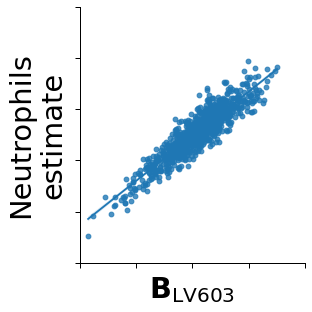

In [10]:
with sns.plotting_context("paper", font_scale=3.0):
    g = sns.lmplot(
        data=data.rename(
            columns={
                f"recount2_LV{LV_NUMBER_SELECTED}": f"MultiPLIER LV{LV_NUMBER_SELECTED}",
                "Neutrophil_estimate": "Neutrophils estimate",
            }
        ),
        x=f"MultiPLIER LV{LV_NUMBER_SELECTED}",
        y="Neutrophils estimate",
        scatter_kws={"rasterized": True},
    )

    g.ax.set_xlabel(f"$\mathbf{{B}}_{{\mathrm{{LV}}{LV_NUMBER_SELECTED}}}$")
    g.ax.set_ylabel("Neutrophils\nestimate")
    g.set_xticklabels([])
    g.set_yticklabels([])
    plt.tight_layout()

    # save figure
    plt.savefig(
        Path(OUTPUT_FIGURES_DIR, "lv603_vs_multiplier_neutrophils.pdf"),
        dpi=300,
        bbox_inches="tight",
    )